## Author - Sathish
## Unique ID - E0119052

In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import  folium
from docx import *
import glob
from datetime import datetime
import nltk
from docx import Document
from docx import *
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest, anderson
from matplotlib import pyplot
from scipy.stats import norm
from numpy import arange
from numpy import percentile
from numpy.random import seed
from numpy.random import rand
import seaborn as sns

## Q1 - Working on 311-service-requests.csv

## A.Cleaning improper values in zipcode ("NA & NO Clue to Nan")

In [2]:
# Importing Dataframe
df_311_service = pd.read_csv("../Data/311-service-requests.csv")
# Viewing column names
df_311_service.columns

C:\Users\klmsa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

### Here we can see that, incident zip and school zip columns contain zip numbers, so we need to check them for improper values and make them as strung after preprocessing

In [3]:
# Unwanted values
na_values = ['N/A', 'NO CLUE', '0']

# Reading the csv with params for dropping unwanted values and replacing with NA and changing the datatype
df_311_service = pd.read_csv("../Data/311-service-requests.csv", na_values=na_values, dtype={'Incident Zip': str, 'School Zip': str})

In [4]:
df_311_service.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


### Now we can see that, there are no improper values in the df

In [5]:
zip_columns = ['Incident Zip', 'School Zip']

# Datatypes of zip features
print(df_311_service[zip_columns].dtypes)

# NA values of zip features
df_311_service[zip_columns].isna().sum()

Incident Zip    object
School Zip      object
dtype: object


Incident Zip    12263
School Zip          0
dtype: int64

## B.Truncating zip code length

In [6]:
# Checking for long zip codes
long_zipcode = df_311_service['Incident Zip'].str.len()>5
df_311_service['Incident Zip'][long_zipcode].unique()

array(['77092-2016', '55164-0737', '000000', '11549-3650', '29616-0759',
       '35209-3114'], dtype=object)

In [7]:
# Slicing first numbers of zip code for all records
df_311_service['Incident Zip'] = df_311_service['Incident Zip'].str.slice(0,5)

In [8]:
# Now you can see a empty list after slicing
long_zipcode = df_311_service['Incident Zip'].str.len()>5
df_311_service['Incident Zip'][long_zipcode].unique()

array([], dtype=object)

In [9]:
# Same like that for School zip feature
# Slicing first numbers of zip code for all records
df_311_service['School Zip'] = df_311_service['School Zip'].str.slice(0,5)

## C.Locating five servies reported by public agencies of new york

In [10]:
# Initilizing geo coordinate
kol = folium.Map(location = [40.70827532593202, -73.7916039577921], tiles="openstreetmap",zoom_start=10)
# Plotting points
for i in range(5):
    folium.Marker(location=[df_311_service['Latitude'][i], df_311_service['Longitude'][i]]).add_to(kol)
kol

## Q2 - Working on bikes.csv

### A,B - Changing column seperator & and setting latin encoding

In [11]:
# Importing dataframe and fixing seperator and latin encoding
df_bikes=pd.read_csv('../Data/bikes.csv', sep=';',encoding = "latin")
df_bikes

,Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
0,01/01/2012,35,NaN,0,38,51,26,10,16,NaN
1,02/01/2012,83,NaN,1,68,153,53,6,43,NaN
2,03/01/2012,135,NaN,2,104,248,89,3,58,NaN
3,04/01/2012,144,NaN,1,116,318,111,8,61,NaN
4,05/01/2012,197,NaN,2,124,330,97,13,95,NaN
...,...,...,...,...,...,...,...,...,...,...
305,01/11/2012,2405,NaN,1208,1701,3082,2076,165,2461,NaN
306,02/11/2012,1582,NaN,737,1109,2277,1392,97,1888,NaN
307,03/11/2012,844,NaN,380,612,1137,713,105,1302,NaN
308,04/11/2012,966,NaN,446,710,1277,692,197,1374,NaN


### C,E - Parsing the dates,setting index as date

In [12]:
# Importing dataframe and Parsing the dates,making day first, setting index as date
df_bikes=pd.read_csv('../Data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'],index_col='Date')
df_bikes 

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-02-01,83,NaN,1,68,153,53,6,43,NaN
2012-03-01,135,NaN,2,104,248,89,3,58,NaN
2012-04-01,144,NaN,1,116,318,111,8,61,NaN
2012-05-01,197,NaN,2,124,330,97,13,95,NaN
...,...,...,...,...,...,...,...,...,...
2012-01-11,2405,NaN,1208,1701,3082,2076,165,2461,NaN
2012-02-11,1582,NaN,737,1109,2277,1392,97,1888,NaN
2012-03-11,844,NaN,380,612,1137,713,105,1302,NaN


### D - Dates with date value first

In [13]:
time = datetime.now()
df_bikes.index=pd.Series(df_bikes.index).apply(lambda x:x.strftime("%d/%m/%y"))
df_bikes

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
01/01/12,35,NaN,0,38,51,26,10,16,NaN
01/02/12,83,NaN,1,68,153,53,6,43,NaN
01/03/12,135,NaN,2,104,248,89,3,58,NaN
01/04/12,144,NaN,1,116,318,111,8,61,NaN
01/05/12,197,NaN,2,124,330,97,13,95,NaN
...,...,...,...,...,...,...,...,...,...
11/01/12,2405,NaN,1208,1701,3082,2076,165,2461,NaN
11/02/12,1582,NaN,737,1109,2277,1392,97,1888,NaN
11/03/12,844,NaN,380,612,1137,713,105,1302,NaN


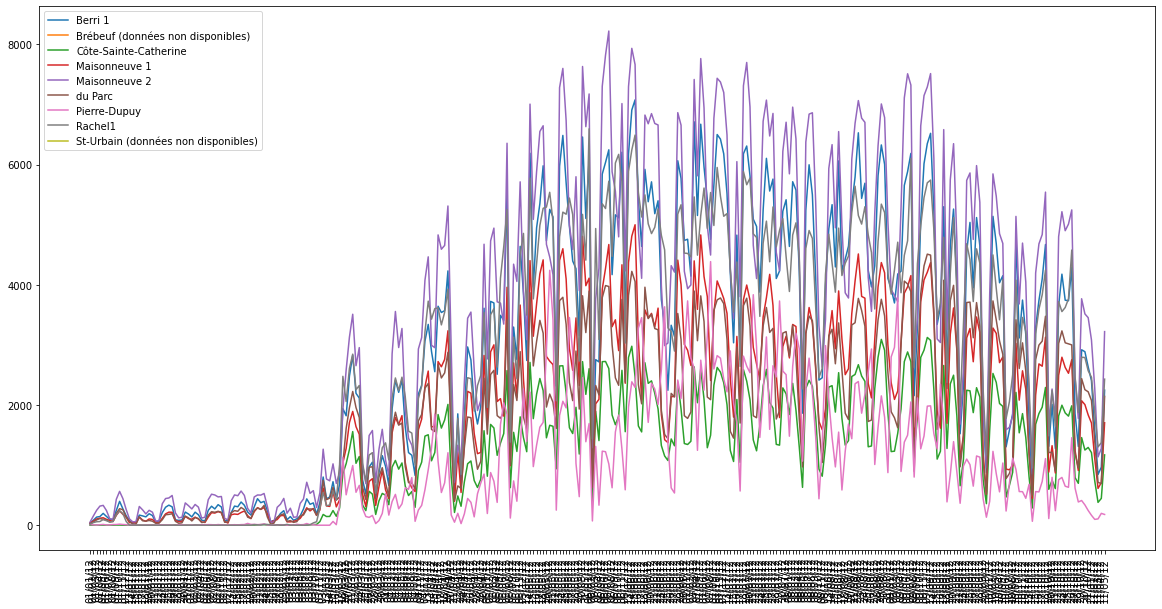

In [14]:
# Number of people on 9 different bike paths in montroel each day
plt.figure(figsize=(20, 10))
plt.plot(df_bikes)
plt.legend(df_bikes.columns)
plt.xticks(rotation=90)
plt.show()

### Q3 - Building Corpus from multiple sources

In [15]:
# Function to scrape text from dox files
def getText(filename):
    doc = Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text.strip("\n"))
    return " ".join(fullText)

In [16]:
# Initialing path
PATH = "../Data/*.docx"
files = glob.glob(PATH)

In [17]:
# Appending contents of all files into a corpus
corpus_CSE355 = []
for f in files:
    cur_corpus = getText(f)
    corpus_CSE355.append(cur_corpus)

In [18]:
# Corpus
corpus_CSE355

["Hey this is text, I am in exam \xa0was an American air-war\xa0\xa0published by\xa0\xa0from 1930 to 1944. Originally titled\xa0Battle Aces, it was retitled by Popular in 1933 after its hero,\xa0G-8, a top pilot and a spy, due to the success of\xa0's\xa0, a\xa0.\xa0\xa0wrote the lead novels for all the G-8 stories, set in World War\xa0I, featuring the Germans threatening the Allies with extraordinary or fantastic schemes, such as giant bats, zombies, and Martians. Hogan and",
 "Hey this is text, I am in exam \xa0was an American air-war\xa0\xa0published by\xa0\xa0from 1930 to 1944. Originally titled\xa0Battle Aces, it was retitled by Popular in 1933 after its hero,\xa0G-8, a top pilot and a spy, due to the success of\xa0's\xa0, a\xa0.\xa0\xa0wrote the lead novels for all the G-8 stories, set in World War\xa0I, featuring the Germans threatening the Allies with extraordinary or fantastic schemes, such as giant bats, zombies, and Martians. Hogan and "]

### Writing contents of all files to a csv flat file

In [19]:
# Filenames list
filenames=['../Data/Text1.docx',"../Data/Text2.docx"]
with open("text.csv", "w") as f:
    for index, filename in enumerate(filenames):
        # writing content to a df
        f.write(getText(filename))
        if index != (len(filenames) - 1):
            f.write(",")
# Loding CSV
text = pd.read_csv('text.csv',encoding= 'unicode_escape')
text

,Hey this is text,I am in exam was an American air-war published by from 1930 to 1944. Originally titled Battle Aces,it was retitled by Popular in 1933 after its hero,G-8,a top pilot and a spy,due to the success of 's,a . wrote the lead novels for all the G-8 stories,set in World War I,featuring the Germans threatening the Allies with extraordinary or fantastic schemes,such as giant bats,...,it was retitled by Popular in 1933 after its hero.1,G-8.1,a top pilot and a spy.1,due to the success of 's .1,a . wrote the lead novels for all the G-8 stories.1,set in World War I.1,featuring the Germans threatening the Allies with extraordinary or fantastic schemes.1,such as giant bats.1,zombies.1,and Martians. Hogan and


## Q4 - Considering hypothesis and testing them with mean  = 50, std = 5

In [20]:
# Setting seed value 
seed(1)

# Setting params (mean, std)
mu, sigma = 50, 5 

# Generating random gaussian numbers
data = np.random.normal(mu, sigma, 500)

#### A) Shapiro Wilko test

In [21]:
# Shapiro Wilko test
stat1, p1 = shapiro(data)
print("********** Normlaity Test : Shapiro-Wilk test ***********")
print('Statistics=%.3f, p=%.3f' %(stat1,p1))
alpha = 0.05
if p1 >alpha:
    print("Fail to reject H0: Sample is Gaussian")
else:
    print("Reject Ho: Sample is not Gaussian")

********** Normlaity Test : Shapiro-Wilk test ***********
Statistics=0.998, p=0.753
Fail to reject H0: Sample is Gaussian


#### B) D'Agostinp's K2 Test

In [22]:
# D'Agostinp's K2 Test
print("**********Normlaity Test :  D’Agostino’s K2 test***********")
stat2, p2 = normaltest(data)
print('Statistics=%.3f, p=%.3f' %(stat2,p2))

#interpret
alpha = 0.05
if p2 >alpha:
    print("Fail to reject H0: Sample is Gaussian")
else:
    print("Reject Ho: Sample is not Gaussian")


**********Normlaity Test :  D’Agostino’s K2 test***********
Statistics=0.379, p=0.827
Fail to reject H0: Sample is Gaussian


#### C) Anderson Darling Test

In [23]:
# Anderson-Darling test
print("**********Normlaity Test : Anderson-Darling test***********")
result = anderson(data)
print('Statistics=%.3f' %result.statistic)
p=0
#interpret
for i in range(len(result.critical_values)):
    s1, cv=result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %3f, Fail to reject H0: Sample is Gaussian' %(s1, cv))
    else:
        print('%.3f: %3f, Reject Ho: Sample is not Gaussian')

**********Normlaity Test : Anderson-Darling test***********
Statistics=0.220
15.000: 0.571000, Fail to reject H0: Sample is Gaussian
10.000: 0.651000, Fail to reject H0: Sample is Gaussian
5.000: 0.781000, Fail to reject H0: Sample is Gaussian
2.500: 0.911000, Fail to reject H0: Sample is Gaussian
1.000: 1.083000, Fail to reject H0: Sample is Gaussian


## Q5 - PDE Function of random sample and five number summary for it

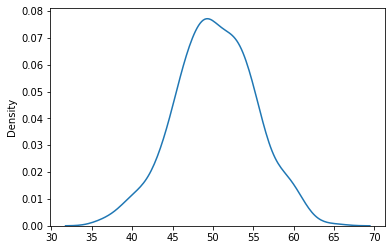

In [24]:
# Defining params
mean = 50
std = 5

# Plotting
sns.kdeplot(data)
pyplot.show()

In [25]:
# Function to print five point summary
def five_point_summary(data):
    five_point_summary = np.quantile(data,[0,0.25,0.5,0.75,1])
    print("Minimum :",five_point_summary[0])
    print("25 % Percentile :",five_point_summary[1])   
    print("50 % Percentile :",five_point_summary[2])
    print("75 % Percentile : ",five_point_summary[3])   
    print("Maximum :",five_point_summary[4])

In [26]:
# Five point summary of the univariate random sample
five_point_summary(data)

Minimum : 36.0345749992673
25 % Percentile : 46.91234620147667
50 % Percentile : 50.19393460942588
75 % Percentile :  53.7046418923327
Maximum : 65.15428556186015
